In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("tanishaj225/loancsv")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/tanishaj225/loancsv/versions/1


In [3]:

import os

path = "/root/.cache/kagglehub/datasets/tanishaj225/loancsv/versions/1"
files = os.listdir(path)
print(files)  # List all files in the directory

['loan.csv']


In [4]:

file_name = "loan.csv"
file_path = os.path.join(path, file_name)

import pandas as pd
dataframe = pd.read_csv(file_path)
print(dataframe.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [5]:



data = pd.DataFrame(dataframe)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


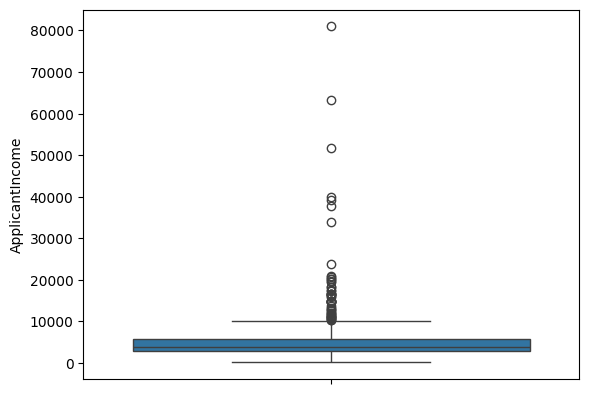

In [8]:
sns.boxplot(data['ApplicantIncome'])
plt.show()

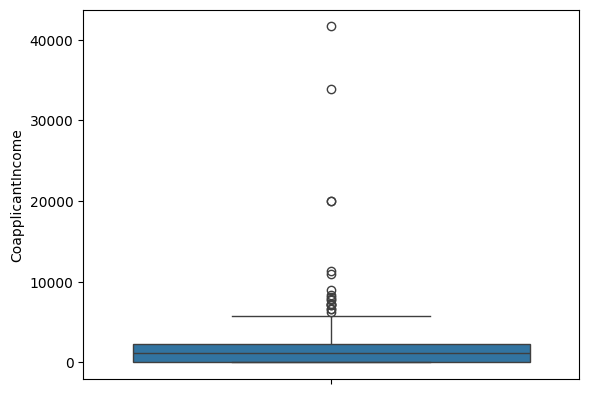

In [9]:
sns.boxplot(data['CoapplicantIncome'])
plt.show()

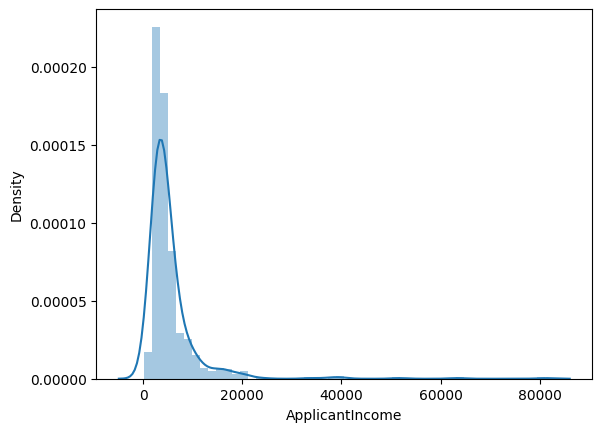

In [10]:
sns.distplot(data['ApplicantIncome'])
plt.show()

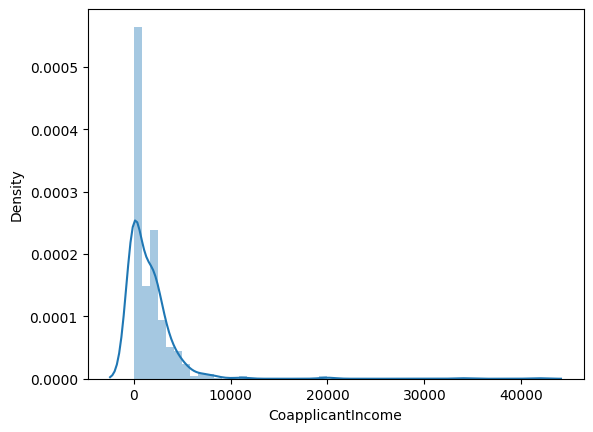

In [11]:
sns.distplot(data['CoapplicantIncome'])
plt.show()

In [12]:
data.shape

(614, 13)

**IQR Method**

In [13]:
q1 = data['ApplicantIncome'].quantile(0.25)
q3 = data['ApplicantIncome'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
lower_bound, upper_bound

(-1498.75, 10171.25)

In [14]:
q1_c = data['CoapplicantIncome'].quantile(0.25)
q3_c = data['CoapplicantIncome'].quantile(0.75)
iqr_c = q3_c - q1_c
lower_bound_c = q1_c - 1.5 * iqr_c
upper_bound_c = q3_c + 1.5 * iqr_c
outliers = data[(data['CoapplicantIncome'] < lower_bound_c) | (data['CoapplicantIncome'] > upper_bound_c)]

In [15]:
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
12,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
38,LP001114,Male,No,0,Graduate,No,4166,7210.0,184.0,360.0,1.0,Urban,Y
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
135,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N
180,LP001633,Male,Yes,1,Graduate,No,6400,7250.0,180.0,360.0,0.0,Urban,N
253,LP001843,Male,Yes,1,Not Graduate,No,2661,7101.0,279.0,180.0,1.0,Semiurban,Y
349,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


In [16]:
outliers_a = data[(data['ApplicantIncome'] < lower_bound_c) | (data['ApplicantIncome'] > upper_bound_c)]

In [17]:
outliers_a

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.0,Rural,Y
599,LP002948,Male,Yes,2,Graduate,No,5780,0.0,192.0,360.0,1.0,Urban,Y
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [18]:
new_data = data[(data['ApplicantIncome'] >= lower_bound) & (data['ApplicantIncome'] <= upper_bound)]
new_data = new_data[(new_data['CoapplicantIncome'] >= lower_bound_c) & (new_data['CoapplicantIncome'] <= upper_bound_c)]

In [19]:
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [20]:
new_data.shape

(548, 13)

In [21]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
new_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,548.000000,548.000000,528.000000,534.000000,503.000000
mean,4128.978102,1359.425036,130.596591,342.584270,0.842942
std,1907.396960,1458.228533,52.532543,65.521343,0.364217
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2768.750000,0.000000,100.000000,360.000000,1.000000
50%,3656.000000,1293.500000,123.000000,360.000000,1.000000
75%,5000.000000,2250.000000,157.000000,360.000000,1.000000
max,10139.000000,5701.000000,376.000000,480.000000,1.000000


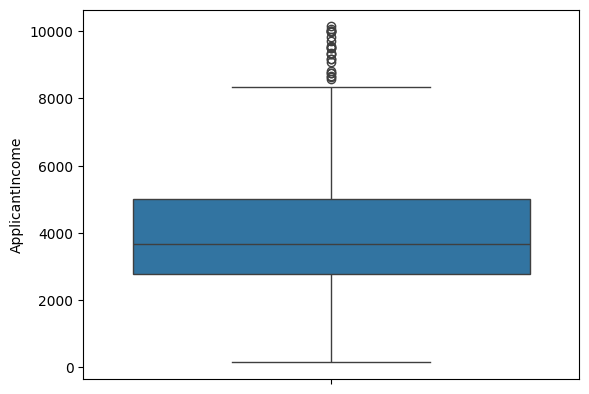

In [23]:
sns.boxplot(new_data['ApplicantIncome'])
plt.show()

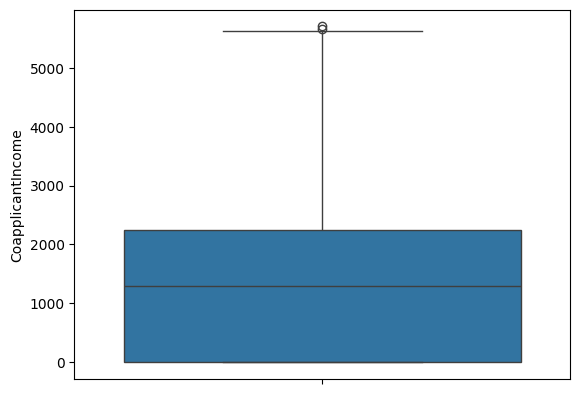

In [24]:
sns.boxplot(new_data['CoapplicantIncome'])
plt.show()

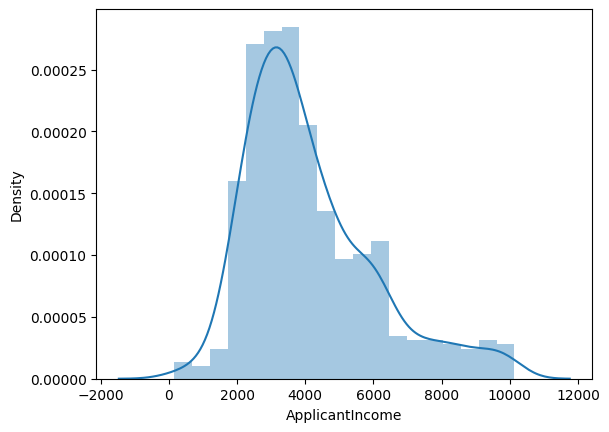

In [25]:
sns.distplot(new_data['ApplicantIncome'])
plt.show()

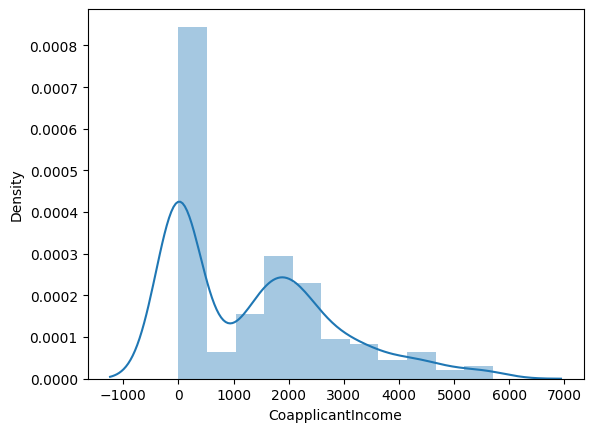

In [26]:
sns.distplot(new_data['CoapplicantIncome'])
plt.show()

**Z-Score Method**

In [27]:
df = pd.DataFrame(dataframe)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(480, 13)

In [31]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


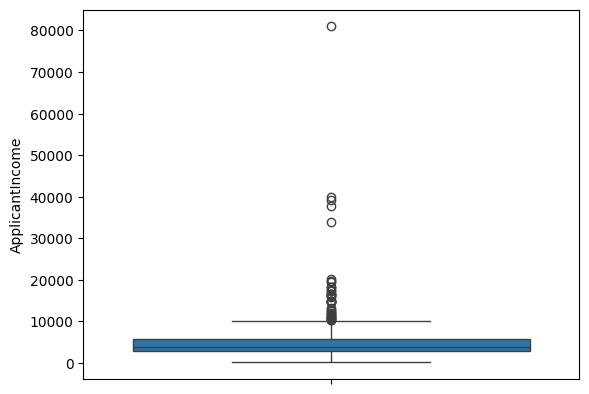

In [32]:
sns.boxplot(df['ApplicantIncome'])
plt.show()

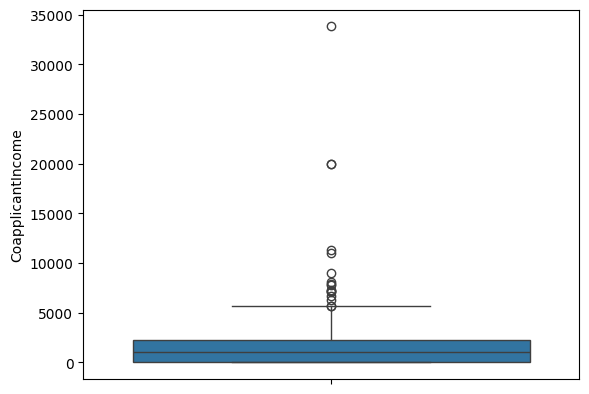

In [33]:
sns.boxplot(df['CoapplicantIncome'])
plt.show()

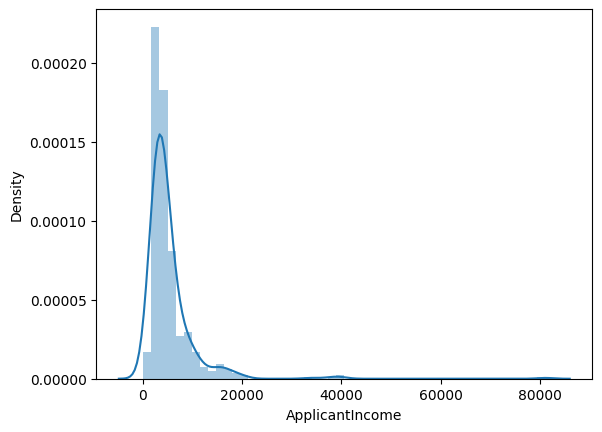

In [34]:
sns.distplot(df['ApplicantIncome'])
plt.show()

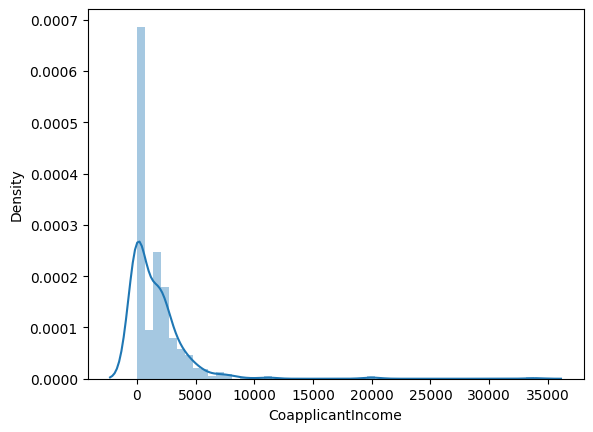

In [35]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [36]:
min_range=df['ApplicantIncome'].mean()-(3*df['ApplicantIncome'].std())
max_range=df['ApplicantIncome'].mean()+(3*df['ApplicantIncome'].std())

In [37]:
min_range,max_range

(-11640.52250202405, 22368.985002024052)

In [38]:
new_df = df[(df['ApplicantIncome'] >= min_range) & (df['ApplicantIncome'] <= max_range)]

In [39]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [40]:
new_df.shape

(475, 13)

In [41]:
new_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,475.000000,475.000000,475.000000,475.000000,475.000000
mean,4932.884211,1587.736674,143.117895,342.240000,0.856842
std,3369.568634,2623.407886,77.348892,65.110368,0.350603
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2892.000000,0.000000,100.000000,360.000000,1.000000
50%,3850.000000,1126.000000,128.000000,360.000000,1.000000
75%,5816.500000,2253.500000,169.000000,360.000000,1.000000
max,20233.000000,33837.000000,600.000000,480.000000,1.000000


In [42]:
z_score_a = (df['ApplicantIncome'] - df['ApplicantIncome'].mean()) / df['ApplicantIncome'].std()
z_score_c = (df['CoapplicantIncome'] - df['CoapplicantIncome'].mean()) / df['CoapplicantIncome'].std()

In [43]:
z_score_a

,ApplicantIncome
1,-0.137826
2,-0.417101
3,-0.490668
4,0.112163
5,0.009310
...,...
609,-0.434743
610,-0.221979
611,0.477708
612,0.391438


In [44]:
df['z_score_a'] = z_score_a
df['z_score_c'] = z_score_c

In [45]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score_a,z_score_c
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936


In [46]:
(df['z_score_a'] > - 3).value_counts()

,count
z_score_a,
True,480


In [47]:
(df['z_score_a'] < 3).value_counts()

,count
z_score_a,
True,475
False,5


In [49]:
df_N = df[((df['z_score_a'] < 3) & (df['z_score_a'] > -3)) & ((df['z_score_c'] < 3) & (df['z_score_c'] > -3))]

In [ ]:
#df_N = df[(df['z_score_c'] < 3) & (df['z_score_c'] > -3)]

In [50]:
df_N.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score_a,z_score_c
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.137826,-0.027923
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.417101,-0.604003
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,-0.490668,0.296791
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0.112163,-0.604003
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,0.009310,0.998936


In [51]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,z_score_a,z_score_c
count,480.000000,480.000000,480.000000,480.000000,480.000000,4.800000e+02,4.800000e+02
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,2.960595e-17,-6.476301e-18
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,1.000000e+00,1.000000e+00
min,150.000000,0.000000,9.000000,36.000000,0.000000,-9.199012e-01,-6.040028e-01
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,-4.349633e-01,-6.040028e-01
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,-2.655548e-01,-1.897066e-01
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,8.614099e-02,2.567744e-01
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.334376e+01,1.232227e+01


In [52]:
df_N.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,z_score_a,z_score_c
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,4933.674468,1400.148766,141.925532,342.051064,0.857447,-0.075959,-0.069124
std,3359.198374,1693.648788,75.244738,65.430553,0.349989,0.592634,0.647001
min,150.000000,0.000000,9.000000,36.000000,0.000000,-0.919901,-0.604003
25%,2904.250000,0.000000,100.000000,360.000000,1.000000,-0.433993,-0.604003
50%,3854.000000,1062.000000,128.000000,360.000000,1.000000,-0.266437,-0.198302
75%,5817.250000,2229.750000,167.750000,360.000000,1.000000,0.079922,0.247797
max,20233.000000,8980.000000,600.000000,480.000000,1.000000,2.623167,2.826500


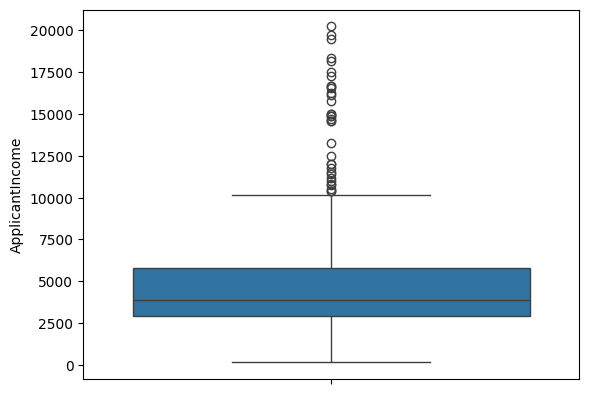

In [53]:
sns.boxplot(df_N['ApplicantIncome'])
plt.show()

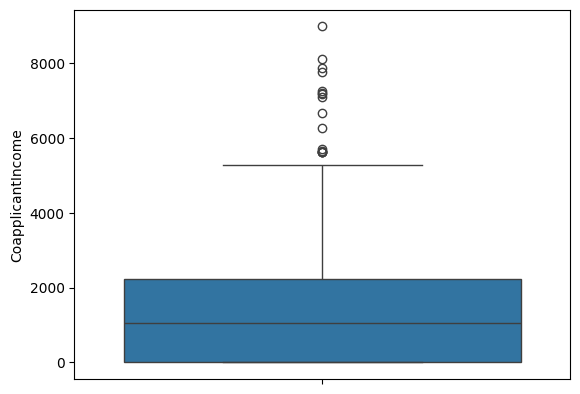

In [54]:
sns.boxplot(df_N['CoapplicantIncome'])
plt.show()